In [491]:
# from google.colab import files
import pandas as pd
import numpy as np
# from google.colab import drive
from sklearn.model_selection import train_test_split
import sys
from sklearn.metrics import classification_report, accuracy_score # for model evaluation metrics
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from collections import Counter
from matplotlib import pyplot
# drive.mount("/content/drive")

In [492]:
openFaceDf = pd.read_csv('ActionUnitsWithLabels.csv')


In [493]:
openFaceDf.set_index('Unnamed: 0', inplace=True)

In [494]:
Counter(openFaceDf['Extraversion'])

Counter({1.0: 59,
         -1.0: 117,
         2.0: 186,
         -2.0: 202,
         0.0: 201,
         -3.0: 11,
         3.0: 37,
         4.0: 14})

In [495]:
#dict for plotting
plot_dict = dict()
for n in range(-4,5):
    plot_dict[n] = 0
plot_dict

{-4: 0, -3: 0, -2: 0, -1: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

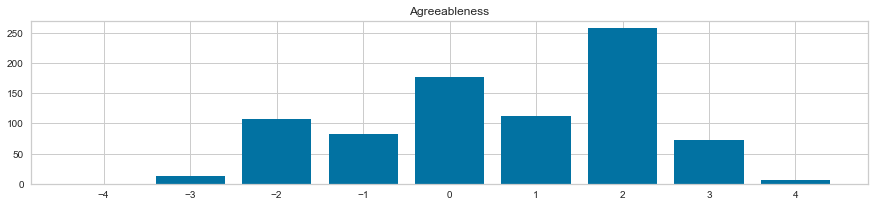

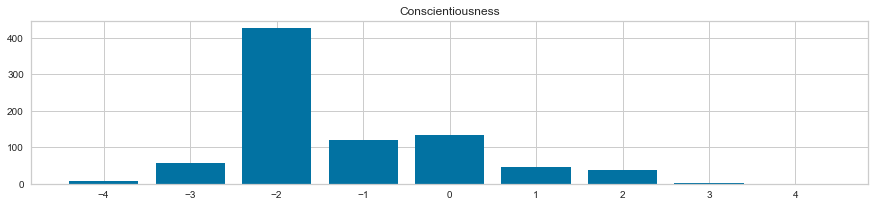

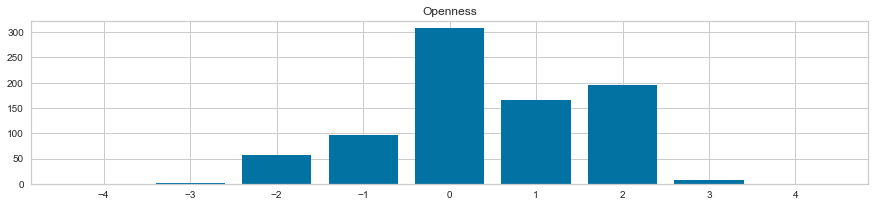

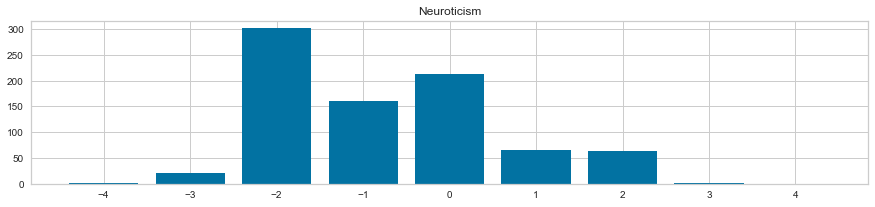

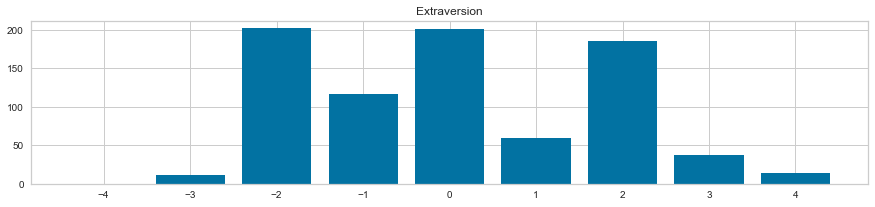

In [496]:
for eachTrait in ['Agreeableness', 'Conscientiousness', 'Openness', 'Neuroticism', 'Extraversion']:
    for key, value in dict(Counter(openFaceDf[eachTrait])).items():
        plot_dict[key] = value
    pyplot.rcParams["figure.figsize"] = (15,3)
    pyplot.bar(plot_dict.keys(), plot_dict.values())
    pyplot.title(eachTrait)
    pyplot.xticks(ticks=list(plot_dict.keys()))
    pyplot.show()
    pyplot.close()
    for n in range(-4,5):
        plot_dict[n] = 0

In [497]:
for k,v in dict(Counter(openFaceDf['Extraversion'])):
    print (k,v)

TypeError: cannot unpack non-iterable float object

In [ ]:
pyplot.bar(dict(Counter(openFaceDf['Openness'])).keys(), dict(Counter(openFaceDf['Openness'])).values(), )

In [ ]:
pyplot.bar(range(-4,4), dict(Counter(openFaceDf['Neuroticism'])).values(),)

In [ ]:
pyplot.bar(dict(Counter(openFaceDf['Neuroticism'])).keys(), dict(Counter(openFaceDf['Neuroticism'])).values(),)

In [ ]:
np.argsort(openFaceDf.loc['00230_940128_fa'] [:-5])

In [498]:
openFaceDf.loc['00308_940422_fa']

 AU01_r              0.00
 AU02_r              0.00
 AU04_r              0.32
 AU05_r              0.09
 AU06_r              2.31
 AU07_r              2.06
 AU09_r              0.89
 AU10_r              2.27
 AU12_r              3.26
 AU14_r              1.45
 AU15_r              0.42
 AU17_r              0.00
 AU20_r              0.82
 AU23_r              0.01
 AU25_r              2.70
 AU26_r              0.50
 AU45_r              0.00
Neuroticism         -2.00
Conscientiousness   -2.00
Extraversion         2.00
Agreeableness        4.00
Openness             2.00
Name: 00308_940422_fa, dtype: float64

In [499]:
openFaceDf.columns

Index([' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', 'Neuroticism',
       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Openness'],
      dtype='object')

# For Extraversion

In [500]:
openFaceExtraversion = openFaceDf.drop(['Agreeableness', 'Conscientiousness', 'Openness', 'Neuroticism'], axis=1)
openFaceAgreeableness = openFaceDf.drop(['Extraversion', 'Conscientiousness', 'Openness', 'Neuroticism'], axis=1)
openFaceConscientious = openFaceDf.drop(['Agreeableness', 'Extraversion', 'Openness', 'Neuroticism'], axis=1)
openFaceOpenness = openFaceDf.drop(['Agreeableness', 'Conscientiousness', 'Extraversion', 'Neuroticism'], axis=1)
openFaceNeuroticism = openFaceDf.drop(['Agreeableness', 'Conscientiousness', 'Openness', 'Extraversion'], axis=1)

# Train and test Split

In [501]:
#! pip install xgboost

In [502]:
openFaceAgreeableness

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Agreeableness
Unnamed: 0,,,,,,,,,,,,,,,,,,
00002_940928_fa,0.23,0.25,0.00,1.53,0.00,0.00,0.20,0.64,0.61,1.40,0.22,0.55,0.28,0.13,0.00,0.00,0.06,2.0
00003_941121_fa,0.07,0.73,0.65,0.97,0.62,0.66,0.00,0.50,0.71,1.29,0.00,0.57,0.50,0.43,0.00,0.00,0.00,2.0
00019_940422_fa,0.00,0.47,0.00,0.66,1.40,1.10,0.95,1.33,0.64,0.56,1.58,1.94,0.52,0.32,0.00,0.00,0.04,2.0
00028_940128_fa,0.00,0.00,0.12,0.00,0.69,0.75,0.81,0.65,0.71,2.25,0.74,0.17,1.52,0.33,0.52,0.72,0.44,1.0
00029_960627_fa,1.45,0.56,0.95,0.00,1.47,1.67,0.75,1.52,1.22,0.77,0.67,0.00,0.97,0.00,1.10,0.97,1.28,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01009_960627_fa,0.64,0.02,0.90,1.14,0.42,0.00,1.43,0.37,0.00,0.29,1.12,0.00,1.54,0.27,0.41,0.87,0.00,0.0
01010_960627_fa,0.38,0.00,0.80,0.00,0.81,0.18,0.05,0.00,0.33,0.65,0.53,0.00,0.87,0.47,0.00,0.52,0.12,0.0
01011_960627_fa,1.98,1.77,0.38,0.00,2.47,1.63,1.50,1.92,2.11,2.56,1.03,1.76,2.70,0.81,0.24,0.40,0.45,2.0


In [503]:
bigFiveTraits = {'Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'}
bigFiveMedians = {}

for each in bigFiveTraits:
    bigFiveMedians[each] = openFaceDf[each].median()
bigFiveMedians

{'Neuroticism': -1.0,
 'Openness': 0.0,
 'Conscientiousness': -2.0,
 'Extraversion': 0.0,
 'Agreeableness': 1.0}

In [567]:
# 
def judgeClassification(actual, pred):
    returnJudgement = []
    for every in range(len(actual)):
        if actual[every] == pred[every]:
            returnJudgement.append(1)
        else:
            returnJudgement.append(0)
    return returnJudgement
    


In [616]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform, ttest_ind, ttest_1samp
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import itertools

X_train= X_test= y_train= y_test= X_val= y_val = None
acc_p_value_dict = {}
traitDataDict = {'Agreeableness': openFaceAgreeableness, 'Conscientiousness':openFaceConscientious, 'Extraversion':openFaceExtraversion, 'Openness':openFaceOpenness, 'Neuroticism':openFaceNeuroticism}

def tuneFitPredict(binaryLabels, algo, CV = "RandomSearchCV"):
    inter_results = []
    inter_apriori_results = []
#     predicted_targets = np.array([])
#     actual_targets = np.array([])
    global X_train, y_train,X_test, y_test, acc_p_value_dict

    for eachTrait in traitDataDict.keys():
        predicted_targets = np.array([])
        actual_targets = np.array([])
        trainData = traitDataDict[eachTrait].iloc[:, :-1].values
        
        if binaryLabels:
            labels = traitDataDict[eachTrait][eachTrait].apply(lambda x : 1 if x> bigFiveMedians[eachTrait] else 0)
        else:
            labels = traitDataDict[eachTrait][eachTrait].values

        cv_outer = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
        # enumerate splits
        for train_ix, test_ix in cv_outer.split(trainData, labels):
            X_train, X_test = trainData[train_ix, :], trainData[test_ix, :]
            y_train, y_test = labels[train_ix], labels[test_ix]
            kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
            if algo == "XGBC":
                model = XGBClassifier(eval_metric='mlogloss', random_state = 1)
                param_grid={
                "learning_rate"    : [0.1, 0.01, 0.05, ] ,
                "max_depth"        : [ 3, 4, 5, 6, 8],
                "reg_lambda"       : [ 0,1.0,3,4,10.0 ],
                "gamma"            : [ 0.0, 0.1, 0.25, 1 ],
                "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
                "scale_pos_weight" : [ 1,3,5],
                "subsample"        : [0,0.25, 0.5, 0.8, 1]
                      }
            elif algo == "KNN":
                model = KNeighborsClassifier()
                param_grid = { 'n_neighbors': [25,27, 29, 31, 33, 35, 37], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
                
            elif algo == "SVM":
                model= SVC()
                param_grid={'kernel': ['rbf'], 'C':[1e-1, 1, 10, 100], 'gamma':[0.1, 1,10,100,1000], 'degree': [1,2,3,4,5]}                
                
            else:
                print("Mentioned Algo is not defined")
                return
            if CV == "RandomSearchCV":
                search = RandomizedSearchCV(model,param_grid, cv=kfold, scoring= 'accuracy', refit=True)
            elif CV == "GridSearchCV":
                search = GridSearchCV(model,param_grid, cv=kfold, scoring= 'accuracy', refit=True)
            else:
                print("Specified CV is not mentioned")
                return
            
            result = search.fit(X_train, y_train)
            modelFinal = result.best_estimator_
            
            y_pred_model = modelFinal.predict(X_test)
            predicted_targets = np.append(predicted_targets, y_pred_model)
            actual_targets = np.append(actual_targets, y_test)
            modelAcc = modelFinal.score(X_test, y_test)
#             print('>acc=%.3f, est=%.3f, cfg=%s' % (modelAcc, result.best_score_, result.best_params_))
            inter_results.append(modelAcc)
        acc_p_value_dict[eachTrait] = inter_results
        
        # A prior classifier
        aprioriModel = DummyClassifier(strategy='prior')
        aprioriModel.fit(trainData,labels)
        y_pred_apriori = aprioriModel.predict(X_test)
        modelCorrectness = judgeClassification(y_test ,y_pred_apriori)

        trait_mean = np.array(inter_results).mean()
        trait_std = np.array(inter_results).std()
        print("Mean accuracy in n repetitions is "+str(trait_mean)+ " with std "+str(trait_std))

        inter_results = []
        p_value = ttest_1samp(modelCorrectness, trait_mean)
        inter_apriori_results = []
        print( "For trait %s achieved p-value is %f with statistic %f"%(eachTrait, p_value.pvalue, p_value.statistic ))
        
        # Plotting Confusion Matrix
        plot_confusion_matrix(predicted_targets, actual_targets, trait = eachTrait)
#         return (predicted_targets, actual_targets)

        #ROC-AUC
        


In [617]:
import warnings
warnings.filterwarnings("ignore")

In [572]:
tuneFitPredict(binaryLabels = True, algo ="SVM")

Mean accuracy in n repetitions is 0.7912371436967384 with std 0.0524967072206588
 For trait Agreeableness achieved p-value is 0.000635 with statistic -3.554492
Mean accuracy in n repetitions is 0.6485218924478402 with std 0.049437770731976256
 For trait Conscientiousness achieved p-value is 0.251996 with statistic -1.153749
Mean accuracy in n repetitions is 0.7979282985600941 with std 0.0495135183302058
 For trait Extraversion achieved p-value is 0.005487 with statistic -2.853520
Mean accuracy in n repetitions is 0.6793270643549808 with std 0.056679330522723594
 For trait Openness achieved p-value is 0.034838 with statistic -2.146346
Mean accuracy in n repetitions is 0.6694460769908904 with std 0.0574454364407613
 For trait Neuroticism achieved p-value is 0.128436 with statistic -1.535996


In [624]:
tuneFitPredict(binaryLabels = True, algo="XGBC", CV="GridSearchCV")

KeyboardInterrupt: 

Mean accuracy in n repetitions is 0.8058330884513665 with std 0.04332448242536671
For trait Agreeableness achieved p-value is 0.000258 with statistic -3.822368
Normalized confusion matrix


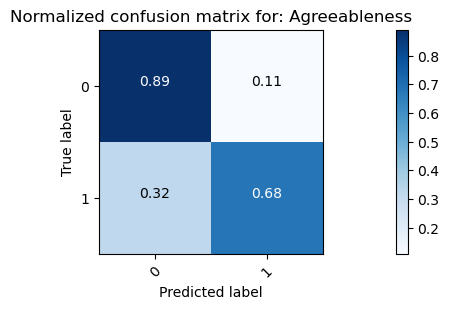

Mean accuracy in n repetitions is 0.6427123126652953 with std 0.0485360904102766
For trait Conscientiousness achieved p-value is 0.297931 with statistic -1.047618
Normalized confusion matrix


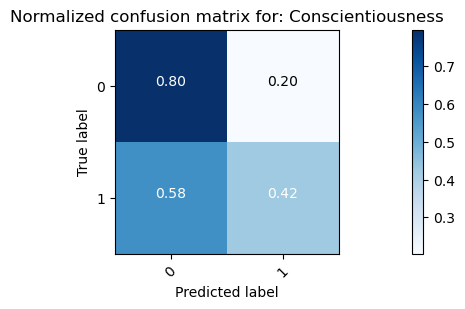

Mean accuracy in n repetitions is 0.8068880399647371 with std 0.0365699608918426
For trait Extraversion achieved p-value is 0.003359 with statistic -3.022181
Normalized confusion matrix


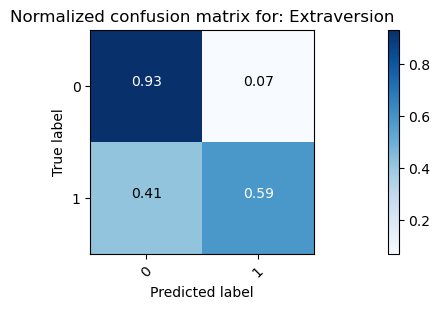

Mean accuracy in n repetitions is 0.6980487804878048 with std 0.04639077854637495
For trait Openness achieved p-value is 0.014981 with statistic -2.485871
Normalized confusion matrix


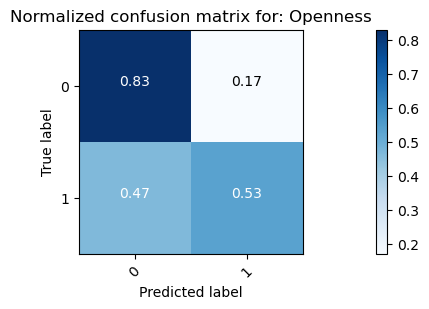

Mean accuracy in n repetitions is 0.6884293270643549 with std 0.04792540842282568
For trait Neuroticism achieved p-value is 0.063319 with statistic -1.882786
Normalized confusion matrix


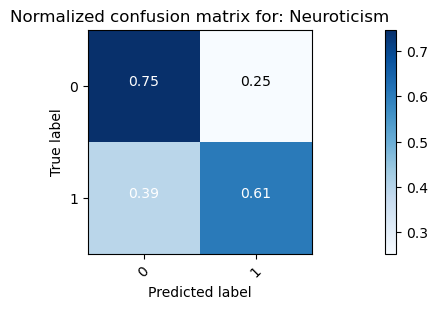

In [636]:
tuneFitPredict(binaryLabels= True, algo= "KNN") # n_repeats = 10, stratified - r_state = 1

In [561]:
tuneFitPredict(binaryLabels = True, algo ="KNN", CV="GridSearchCV")# n_repeats = 10- outer, n_repeats = 10-inner

Mean accuracy in n repetitions is 0.8099485747869528 with std 0.03650546179787918
 For trait Agreeableness achieved p-value is 0.000199
Mean accuracy in n repetitions is 0.6425433441081398 with std 0.04487156241113016
 For trait Conscientiousness achieved p-value is 0.299347
Mean accuracy in n repetitions is 0.8080678812812225 with std 0.040321614552577684
 For trait Extraversion achieved p-value is 0.003144
Mean accuracy in n repetitions is 0.6985571554510726 with std 0.046976739102160645
 For trait Openness achieved p-value is 0.014624
Mean accuracy in n repetitions is 0.6895004407875405 with std 0.04548351537740193
 For trait Neuroticism achieved p-value is 0.060679


# Plotting Confusion Matrix - Code taken from Internet

In [618]:
def plot_confusion_matrix(predicted_labels_list, y_test_list, trait):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix for: '+trait)
    plt.show()

In [619]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

Mean accuracy in n repetitions is 0.7958081104907433 with std 0.053616935537999184
For trait Agreeableness achieved p-value is 0.000481 with statistic -3.638382
Normalized confusion matrix


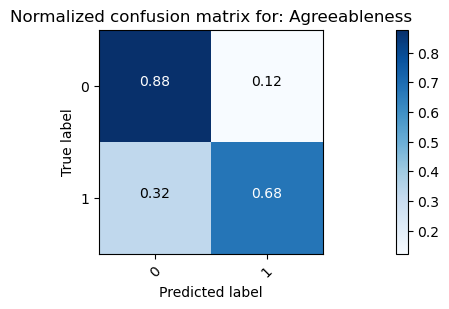

Mean accuracy in n repetitions is 0.6486232735821335 with std 0.042170177010102505
For trait Conscientiousness achieved p-value is 0.251242 with statistic -1.155601
Normalized confusion matrix


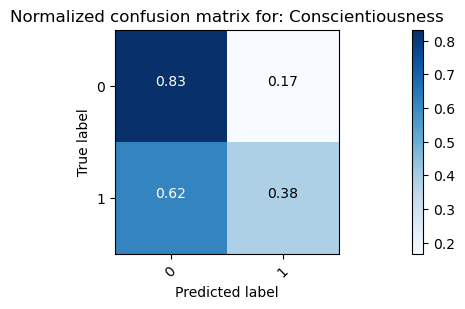

Mean accuracy in n repetitions is 0.8005348222156922 with std 0.04645290670627674
For trait Extraversion achieved p-value is 0.004766 with statistic -2.902586
Normalized confusion matrix


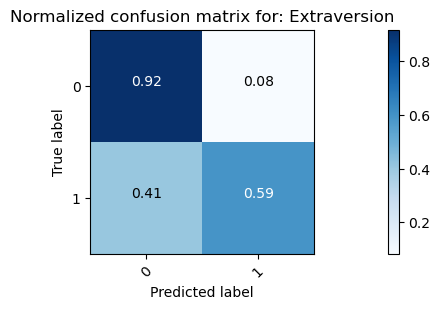

Mean accuracy in n repetitions is 0.6803026741110785 with std 0.056454347933415604
For trait Openness achieved p-value is 0.033407 with statistic -2.164039
Normalized confusion matrix


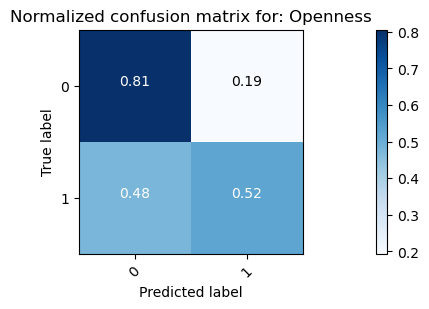

Mean accuracy in n repetitions is 0.6793461651483984 with std 0.05048106743782494
For trait Neuroticism achieved p-value is 0.089828 with statistic -1.716853
Normalized confusion matrix


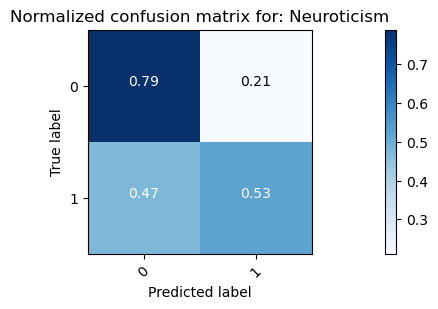

In [651]:
tuneFitPredict(binaryLabels= True, algo= "SVM")

Mean accuracy in n repetitions is 0.8082265647957684 with std 0.04170394374071259
For trait Agreeableness achieved p-value is 0.000222 with statistic -3.866295
Normalized confusion matrix


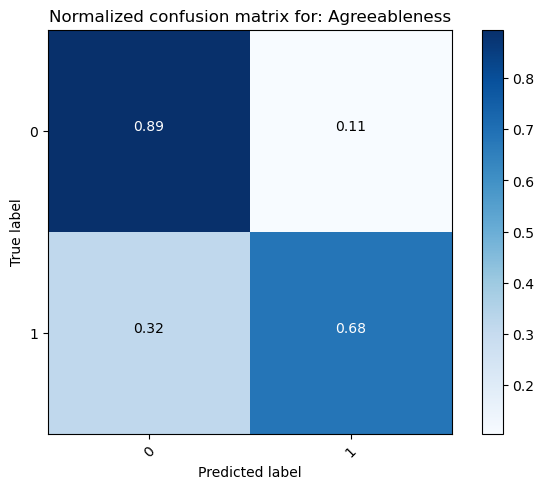

Mean accuracy in n repetitions is 0.6434763444019983 with std 0.04341413678811838
For trait Conscientiousness achieved p-value is 0.291583 with statistic -1.061575
Normalized confusion matrix


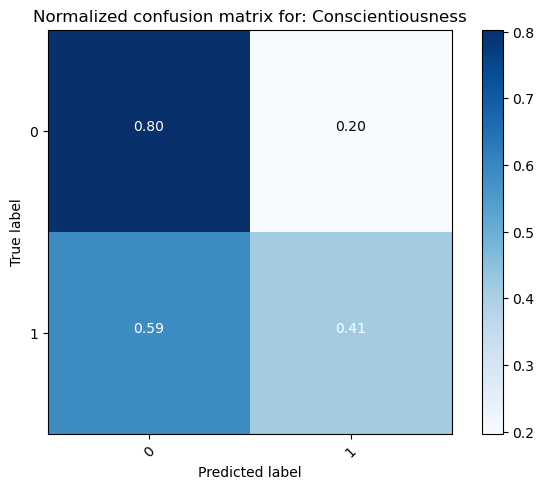

Mean accuracy in n repetitions is 0.8078812812224508 with std 0.033497425558148844
For trait Extraversion achieved p-value is 0.003177 with statistic -3.040878
Normalized confusion matrix


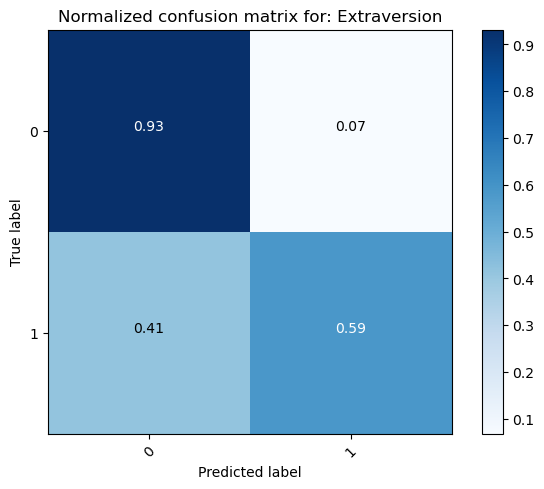

Mean accuracy in n repetitions is 0.6936027034969143 with std 0.04450828635284138
For trait Openness achieved p-value is 0.018441 with statistic -2.405240
Normalized confusion matrix


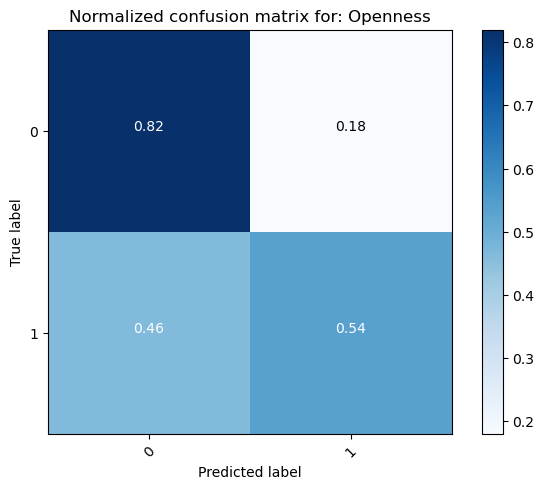

Mean accuracy in n repetitions is 0.6876491331178373 with std 0.04824440614142053
For trait Neuroticism achieved p-value is 0.065303 with statistic -1.868534
Normalized confusion matrix


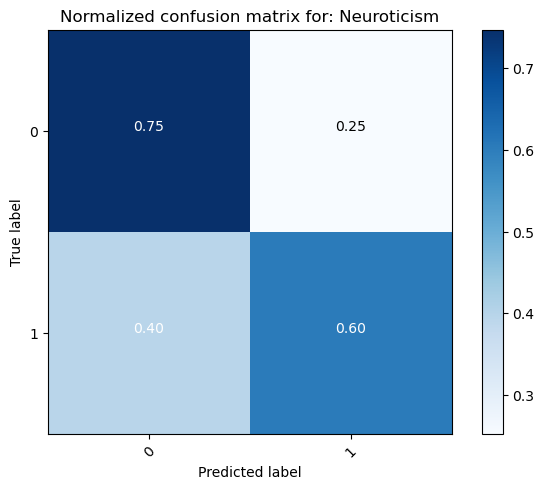

In [620]:
tuneFitPredict(binaryLabels= True, algo= "KNN")


# Train performance throughout the 100 iterations

Text(0.5, 1.0, 'Training Accuracy throughout the 100 iterations for trait Agreeableness')

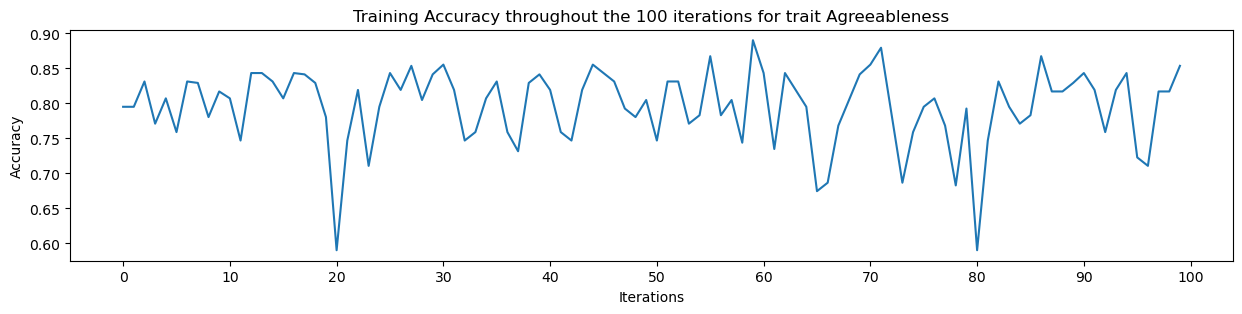

In [654]:
plt.plot((acc_p_value_dict['Agreeableness']))
plt.xticks(range(0,110, 10))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Training Accuracy throughout the 100 iterations for trait Agreeableness")

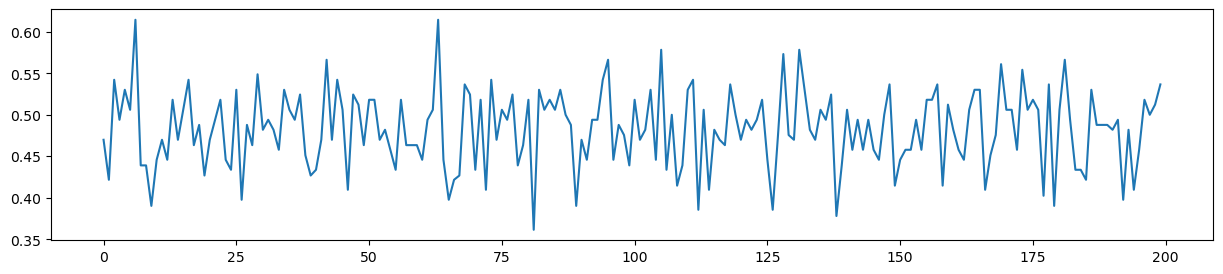

In [641]:

pyplot.rcParams["figure.figsize"] = (15,3)
plt.plot((faceDf['Agreeableness']))
# 

#  PCA

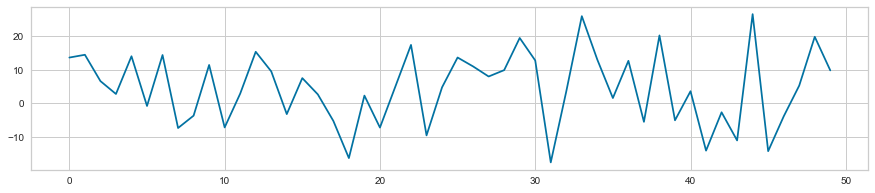

In [324]:
from scipy import stats
rng = np.random.default_rng()
rvs = stats.norm.rvs(loc=5, scale=10, size=(50, 1), random_state=rng)
plt.plot(rvs)

In [523]:
len(acc_p_value_dict['Agreeableness'])

10

In [649]:
faceDf = pd.DataFrame(acc_p_value_dict)

In [650]:
faceDf.describe()

,Agreeableness,Conscientiousness,Extraversion,Openness,Neuroticism
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.805833,0.642712,0.806888,0.698049,0.688429
std,0.043543,0.048781,0.036754,0.046624,0.048167
min,0.698795,0.518072,0.731707,0.597561,0.590361
25%,0.780488,0.614458,0.783133,0.662651,0.656553
50%,0.807229,0.646341,0.795181,0.698795,0.686747
75%,0.833860,0.674699,0.831325,0.734940,0.722892
max,0.926829,0.759036,0.903614,0.783133,0.843373


In [388]:
from sklearn.decomposition import PCA
pca_face = PCA(n_components=2)

# for eachTrait, traitDf in traitDataDict.items():
#     print(eachTrait)
principalComponents_face = pca_face.fit_transform(openFaceConscientious.iloc[:, :-1])
principal_face_Df = pd.DataFrame(data = principalComponents_face
         , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_face.explained_variance_ratio_))

Explained variation per principal component: [0.40162456 0.10230631]


Agreeableness: <BarContainer object of 2 artists>


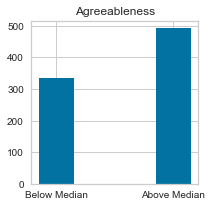

Counter({0: 491, 1: 336})
Conscientiousness: <BarContainer object of 2 artists>


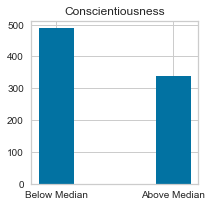

Counter({0: 488, 1: 339})
Extraversion: <BarContainer object of 2 artists>


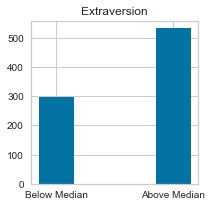

Counter({0: 531, 1: 296})
Openness: <BarContainer object of 2 artists>


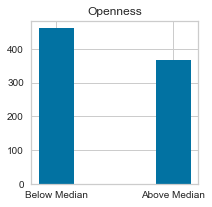

Counter({0: 460, 1: 367})
Neuroticism: <BarContainer object of 2 artists>


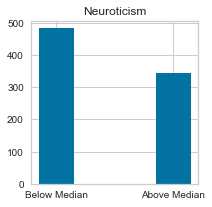

Counter({0: 483, 1: 344})


In [400]:
import matplotlib.pyplot as plt
for eachTrait in traitDataDict.keys():
    labels = traitDataDict[eachTrait][eachTrait].apply(lambda x : 1 if x> bigFiveMedians[eachTrait] else 0)
    print(eachTrait +':',plt.bar(["Below Median","Above Median"], list(dict(Counter(labels)).values()), width=0.3))
    pyplot.rcParams["figure.figsize"] = (3,3)
    pyplot.title(eachTrait)
    plt.show()
    print(Counter(labels))
    plt.close()


<Figure size 216x216 with 0 Axes>

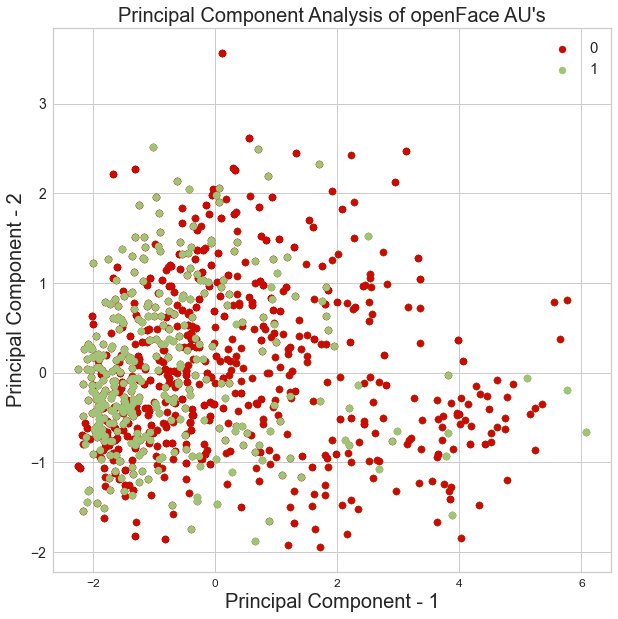

In [401]:
from matplotlib import pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of openFace AU's",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']

for eachTrait,traitDf in traitDataDict.items():
    for target, color in zip(targets,colors):
        indicesToKeep = np.where((traitDf[eachTrait]).apply(lambda x : 1 if x> bigFiveMedians[eachTrait] else 0) == target)
    #     print((indicesToKeep))
        plt.scatter(principal_face_Df.loc[indicesToKeep, 'principal component 1']
                   , principal_face_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [1]:
from PIL import Image

In [122]:
from sklearn.feature_selection import *
r_regression(openFaceExtraversion.iloc[:, :-1], openFaceExtraversion.iloc[:, -1])

NameError: name 'r_regression' is not defined

In [125]:
openFaceExtraversion.iloc[:, :-1]

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
Unnamed: 0,,,,,,,,,,,,,,,,,
00002_940928_fa,0.23,0.25,0.00,1.53,0.00,0.00,0.20,0.64,0.61,1.40,0.22,0.55,0.28,0.13,0.00,0.00,0.06
00003_941121_fa,0.07,0.73,0.65,0.97,0.62,0.66,0.00,0.50,0.71,1.29,0.00,0.57,0.50,0.43,0.00,0.00,0.00
00019_940422_fa,0.00,0.47,0.00,0.66,1.40,1.10,0.95,1.33,0.64,0.56,1.58,1.94,0.52,0.32,0.00,0.00,0.04
00028_940128_fa,0.00,0.00,0.12,0.00,0.69,0.75,0.81,0.65,0.71,2.25,0.74,0.17,1.52,0.33,0.52,0.72,0.44
00029_960627_fa,1.45,0.56,0.95,0.00,1.47,1.67,0.75,1.52,1.22,0.77,0.67,0.00,0.97,0.00,1.10,0.97,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01009_960627_fa,0.64,0.02,0.90,1.14,0.42,0.00,1.43,0.37,0.00,0.29,1.12,0.00,1.54,0.27,0.41,0.87,0.00
01010_960627_fa,0.38,0.00,0.80,0.00,0.81,0.18,0.05,0.00,0.33,0.65,0.53,0.00,0.87,0.47,0.00,0.52,0.12
01011_960627_fa,1.98,1.77,0.38,0.00,2.47,1.63,1.50,1.92,2.11,2.56,1.03,1.76,2.70,0.81,0.24,0.40,0.45


# Feature Correlations with the dependant variables

In [313]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import scipy
import matplotlib.pyplot as plt
import matplotlib.axes as axes

[' AU01_r', ' AU02_r', '**** AU04_r', ' AU05_r', '**** AU06_r', '**** AU07_r', '**** AU09_r', '**** AU10_r', '**** AU12_r', '**** AU14_r', '**** AU15_r', '**** AU17_r', ' AU20_r', ' AU23_r', '**** AU25_r', ' AU26_r', ' AU45_r']


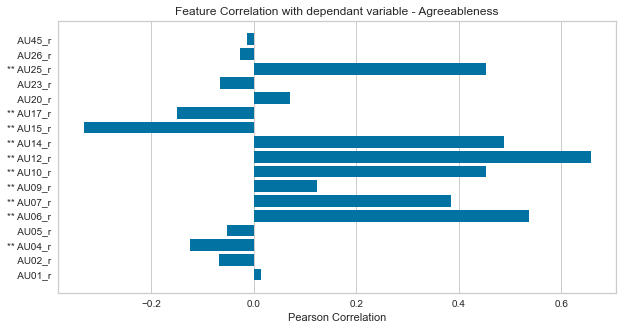

[' AU01_r', '**** AU02_r', ' AU04_r', '**** AU05_r', '**** AU06_r', ' AU07_r', ' AU09_r', '**** AU10_r', '**** AU12_r', '**** AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', '**** AU25_r', ' AU26_r', '**** AU45_r']


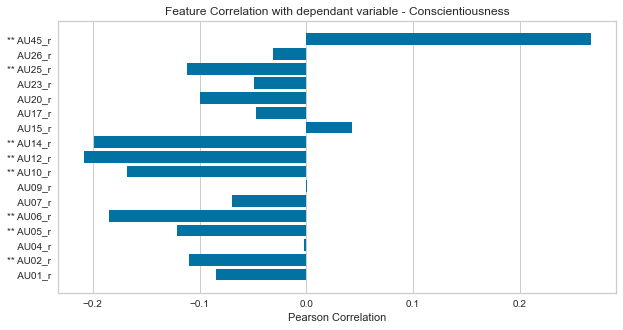

[' AU01_r', '**** AU02_r', ' AU04_r', ' AU05_r', '**** AU06_r', '**** AU07_r', '**** AU09_r', '**** AU10_r', '**** AU12_r', '**** AU14_r', '**** AU15_r', '**** AU17_r', ' AU20_r', ' AU23_r', '**** AU25_r', ' AU26_r', ' AU45_r']


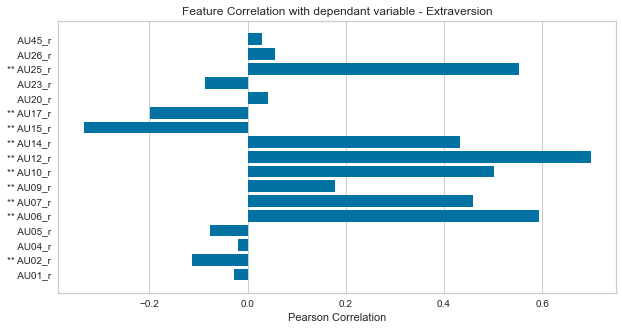

[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', '**** AU06_r', '**** AU07_r', ' AU09_r', '**** AU10_r', '**** AU12_r', '**** AU14_r', '**** AU15_r', '**** AU17_r', ' AU20_r', '**** AU23_r', '**** AU25_r', ' AU26_r', ' AU45_r']


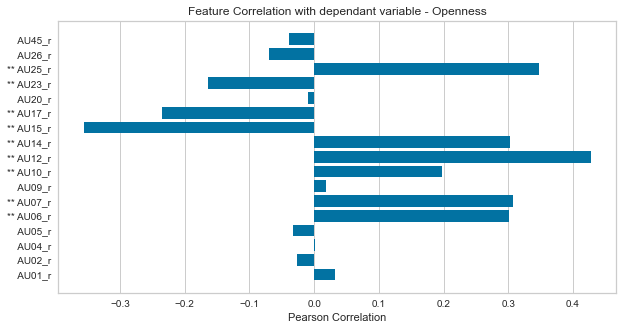

[' AU01_r', ' AU02_r', ' AU04_r', '**** AU05_r', '**** AU06_r', '**** AU07_r', '**** AU09_r', '**** AU10_r', '**** AU12_r', '**** AU14_r', '**** AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', '**** AU25_r', ' AU26_r', ' AU45_r']


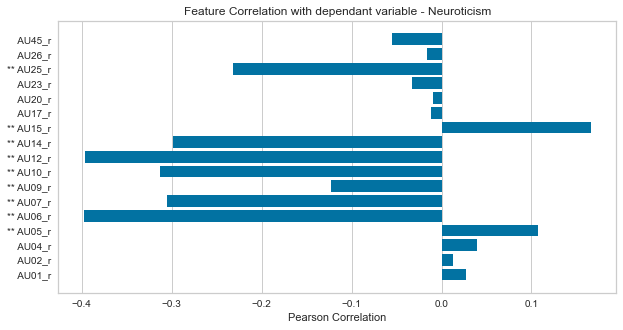

In [337]:
for name, eachTrait in traitDataDict.items():
    # Create a list of the feature names
    feature_names = []
    for n in range(17):
        r, p = scipy.stats.pearsonr(eachTrait.iloc[:,n], eachTrait.iloc[:, -1])
        if p< 0.05/17:
            feature_names.append( '**'+ eachTrait.columns[n])
            eachTrait.rename(columns={eachTrait.columns[n]: "**" + eachTrait.columns[n]})
        else:
            feature_names.append(eachTrait.columns[n])
    features = np.array(eachTrait.columns[:-1])
    print(feature_names)
    visualizer = FeatureCorrelation(labels=features)
    fig, ax = plt.subplots(figsize=(10, 5))
    visualizer.ax = ax
    visualizer.fit(eachTrait.iloc[:, :-1], eachTrait.iloc[:, -1])        # Fit the data to the visualizer
    visualizer.title = "Feature Correlation with dependant variable - "+name.rsplit('openFace')[0]
    visualizer.show(title = name.rsplit('openFace')[0])
    visualizer.show()


In [320]:
print(0.05/5)
for n in range(17):
#     print()
    r, p = scipy.stats.pearsonr(eachTrait.iloc[:,n], eachTrait.iloc[:, -1])
    if p< (0.05):
        print(eachTrait.columns[n]+':',r, p)

0.01
** AU05_r: 0.10730491298578515 0.0020009504370294574
** AU06_r: -0.3981260327265051 8.408476654637552e-33
** AU07_r: -0.30572478979601614 2.365446189495259e-19
** AU09_r: -0.12313599102247837 0.0003863217501103583
** AU10_r: -0.31316473317606713 2.827955754737258e-20
** AU12_r: -0.3964491001439272 1.6216781943575698e-32
** AU14_r: -0.2988411237201622 1.5998677399619622e-18
** AU15_r: 0.16599891543039672 1.5878445189044162e-06
** AU25_r: -0.23164850995231429 1.5460075870891074e-11


In [134]:
features

array([' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r'],
      dtype=object)